In [12]:
import sys

import geopandas as gpd
import movingpandas as mpd
import pandas as pd
from movingpandas import Trajectory

sys.path.append('/home/diviloper/MobilityDB/PyMEOS/')
from pymeos_cffi.functions import meos_initialize
from pymeos import TGeogPointSeq, TGeogPointInst, TGeomPointInst, TGeomPointSeq, TPointSeq, TPointInst
plot_defaults = {'linewidth': 5, 'capstyle': 'round', 'figsize': (9, 3), 'legend': True}

meos_initialize()

In [13]:
def create_point(row) -> TPointInst:
    return TGeogPointInst(string=f"{row['geometry']}@{row.name}")


def extract_wkt_from_traj(trajectory: Trajectory) -> str:
    res = "["
    for row in trajectory.df.iloc():
        res += f'{row.geometry.wkt}@{row.name},'
    res = res[:-1] + ']'
    return res


def create_sequence(trajectory: Trajectory) -> TPointSeq:
    wkt = extract_wkt_from_traj(trajectory)
    return TGeogPointSeq(string=wkt)

### Read AIS CSV

In [14]:
pdf = pd.read_csv('./aisinput.csv')
gdf = gpd.GeoDataFrame(pdf.drop(['latitude', 'longitude'], axis=1),
                       geometry=gpd.points_from_xy(pdf.longitude, pdf.latitude), crs=4326)
gdf.head()

,t,mmsi,sog,geometry
0,2021-01-08 00:00:00,265513270,0.0,POINT (12.27239 57.05900)
1,2021-01-08 00:00:01,219027804,0.0,POINT (11.86628 55.94244)
2,2021-01-08 00:00:01,265513270,0.0,POINT (12.27239 57.05900)
3,2021-01-08 00:00:03,219027804,0.0,POINT (11.86628 55.94244)
4,2021-01-08 00:00:04,265513270,0.0,POINT (12.27239 57.05900)


In [15]:
ships = mpd.TrajectoryCollection(gdf, 'mmsi', t='t')

In [28]:
ship = ships.trajectories[1]
ship.df.head()

,mmsi,sog,geometry
t,,,
2021-01-08 00:00:01,219027804,0.0,POINT (11.86628 55.94244)
2021-01-08 00:00:03,219027804,0.0,POINT (11.86628 55.94244)
2021-01-08 00:00:05,219027804,0.0,POINT (11.86628 55.94244)
2021-01-08 00:00:07,219027804,0.0,POINT (11.86628 55.94244)
2021-01-08 00:00:09,219027804,0.0,POINT (11.86628 55.94244)


/home/diviloper/.local/share/virtualenvs/PyMEOS-aif996WK/lib/python3.8/site-packages/pandas/core/dtypes/cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


<AxesSubplot:>

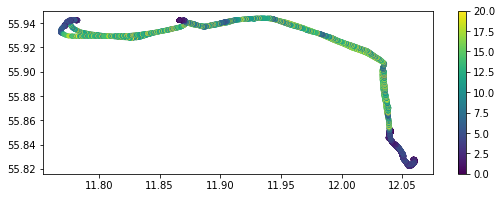

In [29]:
ship.plot(column='speed', vmax=20, **plot_defaults)

In [30]:
ship.df['MEOS Point'] = ship.df.apply(create_point, axis=1)
ship.df.head()

,mmsi,sog,geometry,MEOS Point
t,,,,
2021-01-08 00:00:01,219027804,0.0,POINT (11.86628 55.94244),POINT(11.866 55.942)@2021-01-08 00:00:01+01
2021-01-08 00:00:03,219027804,0.0,POINT (11.86628 55.94244),POINT(11.866 55.942)@2021-01-08 00:00:03+01
2021-01-08 00:00:05,219027804,0.0,POINT (11.86628 55.94244),POINT(11.866 55.942)@2021-01-08 00:00:05+01
2021-01-08 00:00:07,219027804,0.0,POINT (11.86628 55.94244),POINT(11.866 55.942)@2021-01-08 00:00:07+01
2021-01-08 00:00:09,219027804,0.0,POINT (11.86628 55.94244),POINT(11.866 55.942)@2021-01-08 00:00:09+01


In [31]:
ship.df

,mmsi,sog,geometry,MEOS Point
t,,,,
2021-01-08 00:00:01,219027804,0.0,POINT (11.86628 55.94244),POINT(11.866 55.942)@2021-01-08 00:00:01+01
2021-01-08 00:00:03,219027804,0.0,POINT (11.86628 55.94244),POINT(11.866 55.942)@2021-01-08 00:00:03+01
2021-01-08 00:00:05,219027804,0.0,POINT (11.86628 55.94244),POINT(11.866 55.942)@2021-01-08 00:00:05+01
2021-01-08 00:00:07,219027804,0.0,POINT (11.86628 55.94244),POINT(11.866 55.942)@2021-01-08 00:00:07+01
2021-01-08 00:00:09,219027804,0.0,POINT (11.86628 55.94244),POINT(11.866 55.942)@2021-01-08 00:00:09+01
...,...,...,...,...
2021-01-08 23:59:48,219027804,0.0,POINT (11.86628 55.94246),POINT(11.866 55.942)@2021-01-08 23:59:48+01
2021-01-08 23:59:51,219027804,0.0,POINT (11.86628 55.94246),POINT(11.866 55.942)@2021-01-08 23:59:51+01
2021-01-08 23:59:53,219027804,0.0,POINT (11.86628 55.94246),POINT(11.866 55.942)@2021-01-08 23:59:53+01


In [32]:
ship.add_speed(overwrite=True)

In [33]:
ship.add_distance(overwrite=True)
sum(ship.df[ship.distance_col_name])

67296.62869357805

In [34]:
sequence = TGeogPointSeq(instant_list=list(ship.df['MEOS Point']), normalize=False)
sequence.distance

67296.62869402872

In [35]:
sequence = TGeogPointSeq(instant_list=list(ship.df['MEOS Point']), normalize=True)
sequence.distance

64865.70416238803

/home/diviloper/.local/share/virtualenvs/PyMEOS-aif996WK/lib/python3.8/site-packages/pandas/core/dtypes/cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


<AxesSubplot:>

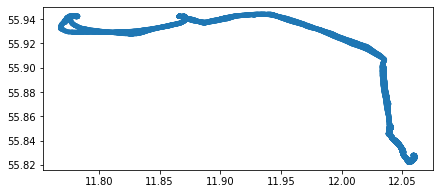

In [36]:
ship.plot(vmax=20, **plot_defaults)

/home/diviloper/.local/share/virtualenvs/PyMEOS-aif996WK/lib/python3.8/site-packages/pandas/core/dtypes/cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


<AxesSubplot:>

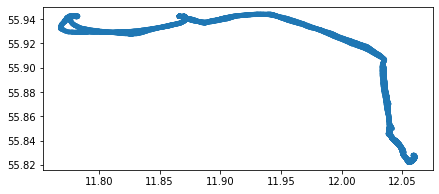

In [37]:
sequence.to_trajectory().plot(vmax=20, **plot_defaults)

In [23]:
sequence.num_instants

1597

In [24]:
len(ship.df)

48323

In [51]:
sequence = create_sequence(ship)
sequence.distance

5202.381848699494

In [25]:
ship.df['distance']

t
2021-01-08 00:00:05    0.000000
2021-01-08 00:00:11    1.671627
2021-01-08 00:00:18    0.777446
2021-01-08 00:00:24    0.000000
2021-01-08 00:00:31    1.011291
                         ...   
2021-01-08 23:59:53    0.163430
2021-01-08 23:59:55    0.000000
2021-01-08 23:59:56    0.211167
2021-01-08 23:59:57    0.126411
2021-01-08 23:59:58    0.339421
Name: distance, Length: 48323, dtype: float64